## Telco Customer Churn Dataset

CONTEXT

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents


### BASIC TERMINOLOGY

In [1]:
##Reading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset haberman as hb
rk =pd.read_csv('Churn.csv')

## printing first 5 values
print(rk.head(5))

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  ...  Day_Charge  Eve_Calls  \
0               1    no        no        yes  ...       45.07         99   
1               1    no        no        yes  ...       27.47        103   
2               0    no        no         no  ...       41.38        110   
3               2    no       yes         no  ...       50.90         88   
4               3    no       yes         no  ...       28.34        122   

   Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  S

In [2]:
# printing the columns
print("The columns of this dataset are " , rk.columns)\

The columns of this dataset are  Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')


In [3]:
#printing the shape
print("The shape of the dataset is or number of data points and features", rk.shape)

The shape of the dataset is or number of data points and features (3333, 21)


In [4]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

Here we can see that all are non- null values, hence we need not handle missing data. We are good to go.

In [5]:
rk.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
rk.nunique()

Account_Length     212
Vmail_Message       46
Day_Mins          1667
Eve_Mins          1611
Night_Mins        1591
Intl_Mins          162
CustServ_Calls      10
Churn                2
Intl_Plan            2
Vmail_Plan           2
Day_Calls          119
Day_Charge        1667
Eve_Calls          123
Eve_Charge        1440
Night_Calls        120
Night_Charge       933
Intl_Calls          21
Intl_Charge        162
State               51
Area_Code            3
Phone             3333
dtype: int64

In [7]:
rk['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
NV     66
CO     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Above is the state wise value count. We can see that most of the customers are from West Virginia and least are from California

### 2D Scatter Plots

We are going to perform EDA with help of permutations and combinations of different features We have following combinations
(21C2= 210 combinations):- But we cant plot every scatter plot, hence will choose some features arbitrarly.

    
    
1. CustServ_Calls and Churn
2. Vmail_Plan and Churn
3. Account_Length and Churn
4. Intl_Calls and Area_Code



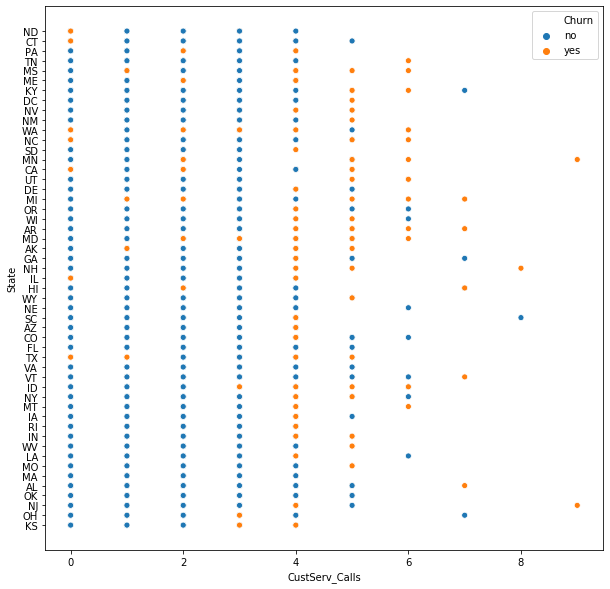

In [8]:

## 1. CustServ_Calls and State 

fig, ax = plt.subplots(figsize=(10,10)) 

sns.scatterplot(data= rk, x='CustServ_Calls', y='State', hue = "Churn") 

plt.show()



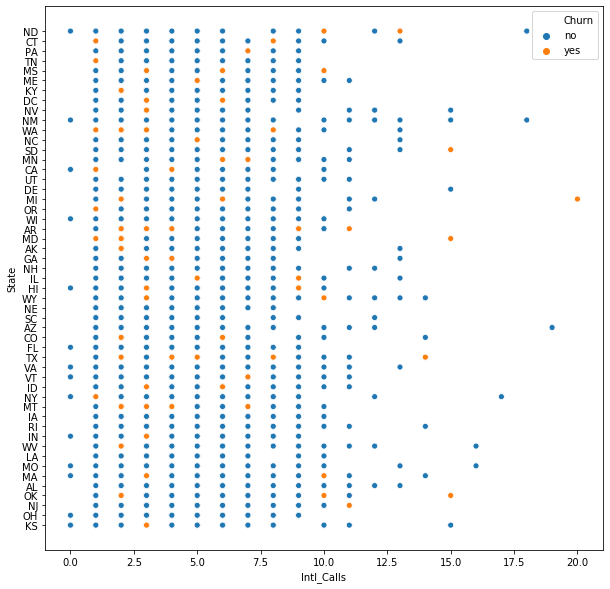

In [9]:

## international calls and state
fig, ax = plt.subplots(figsize=(10,10)) 

sns.scatterplot(data= rk, x='Intl_Calls', y='State', hue = "Churn") 


##### the data is neither interpretable or linearly separable. Lets see some other data analysis methods

### Heatmap

In [10]:

heatmap_df1 = rk[['State', 'Churn', 'Intl_Calls']]
heatmap_df1.shape


(3333, 3)

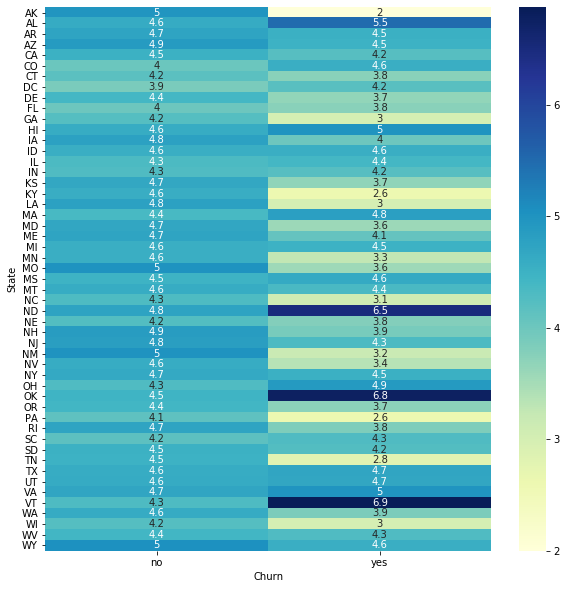

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap_data1 = pd.pivot_table(heatmap_df1, values = 'Intl_Calls', index='State', columns = 'Churn')

sns.heatmap(heatmap_data1, cmap="YlGnBu", annot= True)


##### the data is neither interpretable or linearly separable. Lets see some other data analysis methods

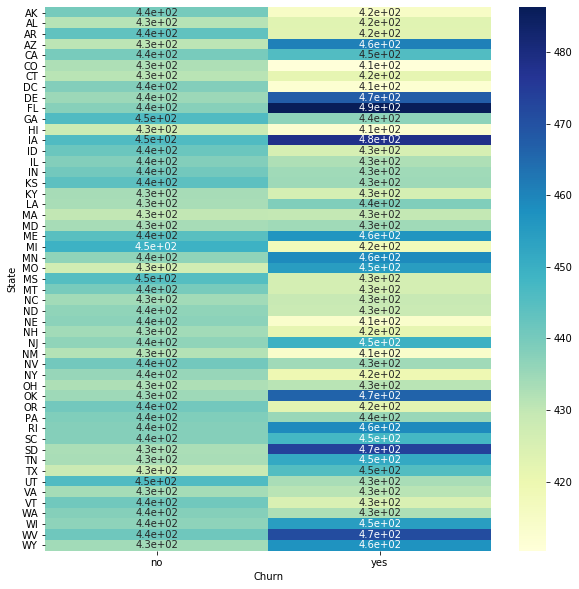

In [12]:

heatmap_df1 = rk[['State', 'Churn', 'Area_Code']]
heatmap_df1.shape


fig, ax = plt.subplots(figsize=(10,10)) 

heatmap_data1 = pd.pivot_table(heatmap_df1, values = 'Area_Code', index='State', columns = 'Churn')

sns.heatmap(heatmap_data1, cmap="YlGnBu", annot= True)



In [13]:
#### 

######

plt.close();
sns.set_style("whitegrid");
sns.pairplot(rk, hue="Churn", size=3);
plt.show()

### HISTOGRAMS, CDF, PDF 

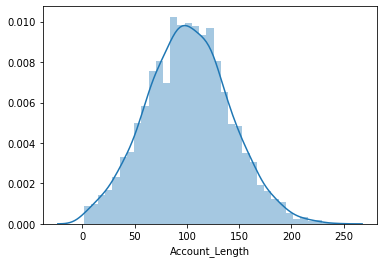

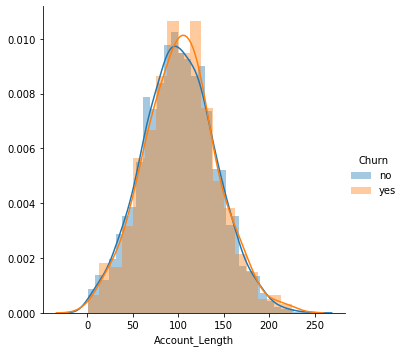

In [14]:
# Here we are going to make a histogram for "Account Length"

sns.distplot(rk['Account_Length'])
plt.show()


# Here we can going to make a histogram for both values of churn
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid(rk, hue="Churn", size=5)
s1=s1.map(sns.distplot,"Account_Length")
s1=s1.add_legend()


[0.02970297 0.06810681 0.14971497 0.22022202 0.23012301 0.17251725
 0.08580858 0.03330333 0.00840084 0.00210021]
[  1.   25.2  49.4  73.6  97.8 122.  146.2 170.4 194.6 218.8 243. ]


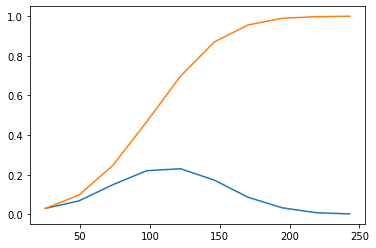

In [15]:

counts, bin_edges = np.histogram(rk['Account_Length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

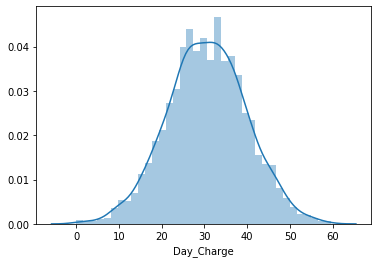

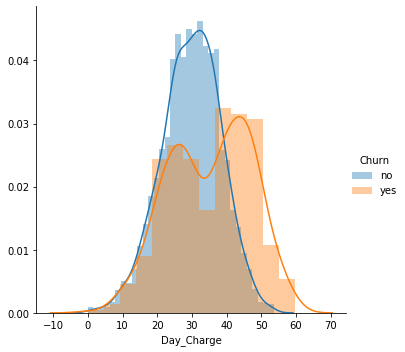

In [16]:
sns.distplot(rk['Day_Charge'])
plt.show()

s1=sns.FacetGrid(rk, hue="Churn", size=5)
s1=s1.map(sns.distplot,"Day_Charge")
s1=s1.add_legend()


Here the Churners have more spread than non-Churners

[0.00420042 0.02010201 0.06030603 0.14371437 0.23942394 0.24362436
 0.17821782 0.07920792 0.02520252 0.0060006 ]
[ 0.     5.964 11.928 17.892 23.856 29.82  35.784 41.748 47.712 53.676
 59.64 ]


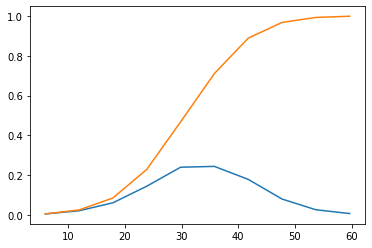

In [17]:

counts, bin_edges = np.histogram(rk['Day_Charge'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

###  Median, Percentile, Quantile, IQR, MAD

In [18]:
print("Means:")
print('Mean account length', np.mean(rk['Account_Length']))

Means:
Mean account length 101.06480648064806


In [19]:
print("Medians:")
print('Median account length', np.median(rk['Account_Length']))

Medians:
Median account length 101.0


In [20]:
print("Quantiles:")
print('Quantile account length', np.percentile(rk['Account_Length'],np.arange(0, 100, 25)))

Quantiles:
Quantile account length [  1.  74. 101. 127.]


In [21]:
print("90th percentile:")
print('90 percentile', np.percentile(rk['Account_Length'],90))

90th percentile:
90 percentile 152.0


In [22]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(rk['Account_Length']))


Median Absolute Deviation
40.030259899651256


### Box Plots and Whiskers

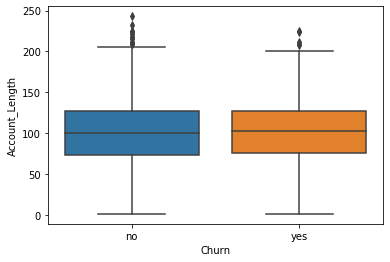

In [23]:
sns.boxplot(x= 'Churn', y= 'Account_Length', data= rk)
plt.show()

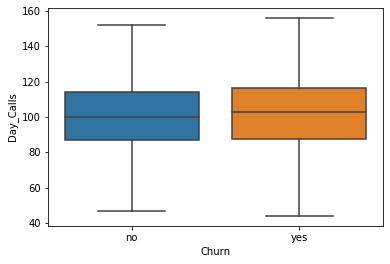

In [24]:
sns.boxplot(x= 'Churn', y= 'Day_Calls', data= rk, sym='')
plt.show()

### Violin Plots

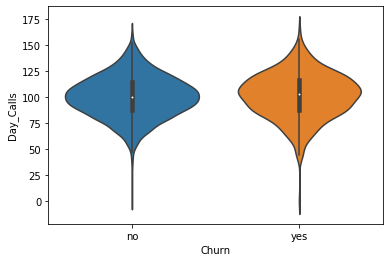

In [25]:
sns.violinplot(x= 'Churn', y= 'Day_Calls', data= rk)

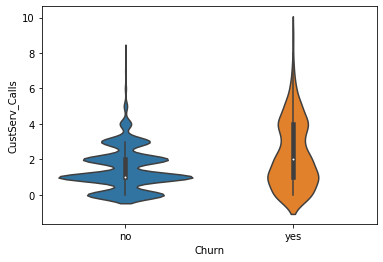

In [26]:
sns.violinplot(x= 'Churn', y= 'CustServ_Calls', data= rk)

In [27]:
rk.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [28]:
churn = rk.loc[rk['Churn']=='yes']

not_churn = rk.loc[rk['Churn']=='no']

### Multivariate Probability density, Contour Plots

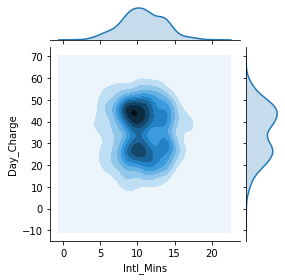

In [29]:
sns.jointplot(x="Intl_Mins", y="Day_Charge", data=churn, kind="kde",size=4)

plt.show()

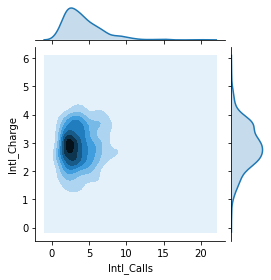

In [30]:
sns.jointplot(x="Intl_Calls", y="Intl_Charge", data=churn, kind="kde",size=4)

plt.show()

### DATA ANALYSIS

In [31]:
y_value_counts = rk['Churn'].value_counts()
y_value_counts

no     2850
yes     483
Name: Churn, dtype: int64

In [32]:
churn = y_value_counts[1]
nonchurn = y_value_counts[0]

In [33]:
print("Percenatage of customers that churn ", (churn/(churn + nonchurn))*100, "%")
print("Percenatage of customers that do not churn ", (nonchurn/(churn + nonchurn))*100, "%")

Percenatage of customers that churn  14.491449144914492 %
Percenatage of customers that do not churn  85.5085508550855 %


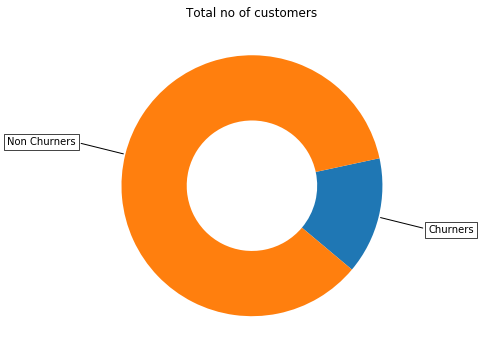

In [34]:


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Churners", "Non Churners"]

data = [churn, nonchurn]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Total no of customers")

plt.show()

## Splitting Data

#### Dropping unnecessary features

In [35]:
y = rk['Churn']
y = y.replace('yes', 1)
y = y.replace('no', 0)

In [36]:
X = rk
X.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [37]:
X = X.drop(X[['Area_Code','Phone', 'Churn']], axis=1)

In [38]:
X.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls',
       'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge',
       'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')

In [39]:
print("Shape of X is", X.shape)
print("Shape of y is", y.shape) ##cross-checking shape as input variables must be consistent

## Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print('\nShape of X_train -', X_train.shape , '\nShape of X_test-' , X_test.shape, '\nShape of y_train-' , y_train.shape, '\nShape of y_test-', y_test.shape)


Shape of X is (3333, 18)
Shape of y is (3333,)

Shape of X_train - (2233, 18) 
Shape of X_test- (1100, 18) 
Shape of y_train- (2233,) 
Shape of y_test- (1100,)


### Feature engineering

We shall add new features to gain more insight.

1. Avg Night calls = night calls / night mins
2. Avg Day calls = day calls / day mins
3. Avg Eve calls = eve calls / eve mins
4. Total mins = Day mins + eve mins + night mins
5. Total calls = day calls + eve calls + night calls
6. Total charge = day charge + eve charge + night charge

In [40]:
X_train['Avg_Night_Calls']= X_train['Night_Calls']/X_train['Night_Mins'] 

X_train['Avg_Day_Calls']= X_train['Day_Calls']/X_train['Day_Mins'] 

X_train['Avg_Eve_Calls']= X_train['Eve_Calls']/X_train['Eve_Mins'] 

X_train['Avg_Intl_Calls']= X_train['Intl_Calls']/X_train['Intl_Mins'] 

X_train['Total_Mins'] = X_train['Day_Mins'] + X_train['Eve_Mins'] + X_train['Night_Mins']

X_train['Total_Calls'] = X_train['Day_Calls'] + X_train['Eve_Calls'] + X_train['Night_Calls']

X_train['Total_Charge'] = X_train['Day_Charge'] + X_train['Eve_Charge'] + X_train['Night_Charge']

In [41]:
X_test['Avg_Night_Calls']= X_test['Night_Calls']/X_test['Night_Mins'] 

X_test['Avg_Day_Calls']= X_test['Day_Calls']/X_test['Day_Mins'] 

X_test['Avg_Eve_Calls']= X_test['Eve_Calls']/X_test['Eve_Mins'] 

X_test['Avg_Intl_Calls']= X_test['Intl_Calls']/X_test['Intl_Mins'] 

X_test['Total_Mins'] = X_test['Day_Mins'] + X_test['Eve_Mins'] + X_test['Night_Mins']

X_test['Total_Calls'] = X_test['Day_Calls'] + X_test['Eve_Calls'] + X_test['Night_Calls']

X_test['Total_Charge'] = X_test['Day_Charge'] + X_test['Eve_Charge'] + X_test['Night_Charge']

In [42]:
X_train = X_train.drop(['Night_Calls', 'Day_Calls' , 'Eve_Calls',  'Day_Mins', 'Eve_Mins', 'Night_Mins',  
              'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Calls', 'Intl_Mins'], axis=1)

X_test = X_test.drop(['Night_Calls', 'Day_Calls' , 'Eve_Calls',  'Day_Mins', 'Eve_Mins', 'Night_Mins',  
              'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Calls', 'Intl_Mins'], axis=1)

### Preparing Data for modeling

Categorical Data :-

- Churn
- Intl_Plan
- Vmail_Plan
- Area_Code
- State



Numerical Data :-
    
- Account length
- Avg Night calls 
- Avg Day calls 
- Avg Eve calls 
- Avg Intl calls
- Total mins
- Total calls
- Total charge


### One hot encoding Categorical Data 

#### one hot encoding State

In [43]:
# we use count vectorizer to convert the "state" values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['State'].values)
print(vectorizer.get_feature_names())




X_train_State_ohe = vectorizer.transform(X_train['State'].values)
X_test_State_ohe = vectorizer.transform(X_test['State'].values)


print('After vectorizations')
print(X_train_State_ohe.shape, y_train.shape)
print(X_test_State_ohe.shape, y_test.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After vectorizations
(2233, 51) (2233,)
(1100, 51) (1100,)


#### Note
here state is a categorical feature with many catergories, howver Intl_Plan and Vmail_Plan only have two categories. 
So rather than doing one hot encoding, we can simply replace "no" and "yes" with 0 & 1.

#### One hot encoding Vmail_Plan

In [44]:

X_train['Vmail_Plan'] = X_train['Vmail_Plan'].replace('yes', 1)
X_train['Vmail_Plan'] = X_train['Vmail_Plan'].replace('no',0)


X_test['Vmail_Plan'] = X_test['Vmail_Plan'].replace('yes', 1)
X_test['Vmail_Plan'] = X_test['Vmail_Plan'].replace('no',0)

X_train['Vmail_Plan'].shape

(2233,)

#### One hot encoding Intl_Plan

In [45]:
# we use drop instead of internal functions of one hot encoding


X_train['Intl_Plan'] = X_train['Intl_Plan'].replace('yes', 1)
X_train['Intl_Plan'] = X_train['Intl_Plan'].replace('no',0)


X_test['Intl_Plan'] = X_test['Intl_Plan'].replace('yes', 1)
X_test['Intl_Plan'] = X_test['Intl_Plan'].replace('no',0)

X_train['Intl_Plan'].shape

(2233,)

In [46]:
X_train['Avg_Intl_Calls']

275     0.510204
1609    0.357143
1680    0.078740
2882    0.175439
2497    0.952381
          ...   
680     0.152672
2465    0.602410
1901    0.588235
2097    0.408163
2760    0.281690
Name: Avg_Intl_Calls, Length: 2233, dtype: float64

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 275 to 2760
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   2233 non-null   int64  
 1   Vmail_Message    2233 non-null   int64  
 2   CustServ_Calls   2233 non-null   int64  
 3   Intl_Plan        2233 non-null   int64  
 4   Vmail_Plan       2233 non-null   int64  
 5   Intl_Charge      2233 non-null   float64
 6   State            2233 non-null   object 
 7   Avg_Night_Calls  2233 non-null   float64
 8   Avg_Day_Calls    2232 non-null   float64
 9   Avg_Eve_Calls    2232 non-null   float64
 10  Avg_Intl_Calls   2222 non-null   float64
 11  Total_Mins       2233 non-null   float64
 12  Total_Calls      2233 non-null   int64  
 13  Total_Charge     2233 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 261.7+ KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 2939 to 2666
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   1100 non-null   int64  
 1   Vmail_Message    1100 non-null   int64  
 2   CustServ_Calls   1100 non-null   int64  
 3   Intl_Plan        1100 non-null   int64  
 4   Vmail_Plan       1100 non-null   int64  
 5   Intl_Charge      1100 non-null   float64
 6   State            1100 non-null   object 
 7   Avg_Night_Calls  1100 non-null   float64
 8   Avg_Day_Calls    1099 non-null   float64
 9   Avg_Eve_Calls    1100 non-null   float64
 10  Avg_Intl_Calls   1093 non-null   float64
 11  Total_Mins       1100 non-null   float64
 12  Total_Calls      1100 non-null   int64  
 13  Total_Charge     1100 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 128.9+ KB


Now we can see that there are lot of null values in Avg_Intl_calls and Avg_day_calls.
Hence we shall impute or replace this value. Here better imputing, we will replace these 
null values with 0.

X_train.loc[X_train['Avg_Intl_Calls'].isnull()]

X_train.loc[X_train['Avg_Day_Calls'].isnull()]

In [49]:
 ## replacing the null values
X_train['Avg_Intl_Calls'].fillna('0', inplace= True) 
X_train['Avg_Day_Calls'].fillna('0', inplace= True) 
X_train['Avg_Eve_Calls'].fillna('0', inplace= True) 

X_test['Avg_Intl_Calls'].fillna('0', inplace= True) 
X_test['Avg_Day_Calls'].fillna('0', inplace= True) 

All the null values are filled now & we can proceed.

### Standardising Numerical Data

#### standardising account length 

In [50]:
rk['Account_Length'].values.shape

(3333,)

In [51]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

account_scalar = StandardScaler()
account_scalar.fit(X_train['Account_Length'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_account_std = account_scalar.transform(X_train['Account_Length'].values.reshape(-1, 1))
X_test_account_std = account_scalar.transform(X_test['Account_Length'].values.reshape(-1, 1))


print(X_train_account_std.shape, y_train.shape)
print(X_test_account_std.shape , y_test.shape)

Mean : 101.2064487236901, Standard deviation : 40.13725793772771
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising avg night calls

In [52]:

account_scalar = StandardScaler()
account_scalar.fit(X_train['Avg_Night_Calls'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Avg_Night_Calls_std = account_scalar.transform(X_train['Avg_Night_Calls'].values.reshape(-1, 1))
X_test_Avg_Night_Calls_std = account_scalar.transform(X_test['Avg_Night_Calls'].values.reshape(-1, 1))


print(X_train_Avg_Night_Calls_std.shape, y_train.shape)
print(X_test_Avg_Night_Calls_std.shape , y_test.shape)

Mean : 0.5378282207582045, Standard deviation : 0.20520971961024545
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising avg day calls

In [53]:

account_scalar.fit(X_train['Avg_Day_Calls'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Avg_Day_Calls_std = account_scalar.transform(X_train['Avg_Day_Calls'].values.reshape(-1, 1))
X_test_Avg_Day_Calls_std = account_scalar.transform(X_test['Avg_Day_Calls'].values.reshape(-1, 1))


print(X_train_Avg_Day_Calls_std.shape, y_train.shape)
print(X_test_Avg_Day_Calls_std.shape , y_test.shape)

Mean : 0.6640409621596454, Standard deviation : 1.0141260054674652
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising avg eve calls

In [54]:

account_scalar.fit(X_train['Avg_Eve_Calls'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Avg_Eve_Calls_std = account_scalar.transform(X_train['Avg_Eve_Calls'].values.reshape(-1, 1))
X_test_Avg_Eve_Calls_std = account_scalar.transform(X_test['Avg_Eve_Calls'].values.reshape(-1, 1))


print(X_train_Avg_Eve_Calls_std.shape, y_train.shape)
print(X_test_Avg_Eve_Calls_std.shape , y_test.shape)

Mean : 0.5394377321365625, Standard deviation : 0.214956028389862
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising avg intl calls

In [55]:

account_scalar.fit(X_train['Avg_Intl_Calls'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Avg_Intl_Calls_std = account_scalar.transform(X_train['Avg_Intl_Calls'].values.reshape(-1, 1))
X_test_Avg_Intl_Calls_std = account_scalar.transform(X_test['Avg_Intl_Calls'].values.reshape(-1, 1))


print(X_train_Avg_Intl_Calls_std.shape, y_train.shape)
print(X_test_Avg_Intl_Calls_std.shape , y_test.shape)

Mean : 0.47258883692857584, Standard deviation : 0.3285472881953633
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising total mins

In [56]:

account_scalar.fit(X_train['Total_Mins'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Total_Mins_std = account_scalar.transform(X_train['Total_Mins'].values.reshape(-1, 1))
X_test_Total_Mins_std = account_scalar.transform(X_test['Total_Mins'].values.reshape(-1, 1))


print(X_train_Total_Mins_std.shape, y_train.shape)
print(X_test_Total_Mins_std.shape , y_test.shape)

Mean : 580.6644424540976, Standard deviation : 89.54931286320773
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising total calls

In [57]:

account_scalar.fit(X_train['Total_Calls'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Total_Calls_std = account_scalar.transform(X_train['Total_Calls'].values.reshape(-1, 1))
X_test_Total_Calls_std = account_scalar.transform(X_test['Total_Calls'].values.reshape(-1, 1))


print(X_train_Total_Calls_std.shape, y_train.shape)
print(X_test_Total_Calls_std.shape , y_test.shape)

Mean : 300.85042543663235, Standard deviation : 34.2163373826785
(2233, 1) (2233,)
(1100, 1) (1100,)


#### standardising total charge

In [58]:

account_scalar.fit(X_train['Total_Charge'].values.reshape(-1,1)) 
print(f"Mean : {account_scalar.mean_[0]}, Standard deviation : {np.sqrt(account_scalar.var_[0])}")


X_train_Total_Charge_std = account_scalar.transform(X_train['Total_Charge'].values.reshape(-1, 1))
X_test_Total_Charge_std = account_scalar.transform(X_test['Total_Charge'].values.reshape(-1, 1))


print(X_train_Total_Charge_std.shape, y_train.shape)
print(X_test_Total_Charge_std.shape , y_test.shape)

Mean : 56.512006269592476, Standard deviation : 10.461356129148138
(2233, 1) (2233,)
(1100, 1) (1100,)


In [59]:
#  X_train_Total_Calls_std, X_train_Total_Charge_std

In [60]:
# X_train_State_ohe ,X_train['Vmail_Plan'] ,X_train['Intl_Plan'] ,X_train_account_std, X_train_Avg_Night_Calls_std, X_train_Avg_Day_Calls_std , X_train_Avg_Eve_Calls_std , X_train_Avg_Intl_Calls_std, X_train_Total_Mins_std X_test_Total_Calls_std, X_test_Total_Charge_std

X_train_State_ohe.shape ,X_train['Vmail_Plan'].shape ,X_train['Intl_Plan'].shape ,X_train_account_std.shape, X_train_Avg_Night_Calls_std.shape, X_train_Avg_Day_Calls_std.shape , X_train_Avg_Eve_Calls_std.shape , X_train_Avg_Intl_Calls_std.shape, X_train_Total_Mins_std.shape, X_train_Total_Calls_std.shape, X_train_Total_Charge_std.shape

((2233, 51),
 (2233,),
 (2233,),
 (2233, 1),
 (2233, 1),
 (2233, 1),
 (2233, 1),
 (2233, 1),
 (2233, 1),
 (2233, 1),
 (2233, 1))

In [61]:

# X_train['Vmail_Plan'].shape
# np.reshape(X_train['Vmail_Plan'],(-1,1))

#np.reshape(b,(len(b),1))

# X_train['Vmail_Plan'].shape

In [62]:
X_train['Vmail_Plan'] 

275     0
1609    0
1680    0
2882    0
2497    1
       ..
680     0
2465    0
1901    0
2097    0
2760    0
Name: Vmail_Plan, Length: 2233, dtype: int64

In [63]:
type(X_train['Vmail_Plan'])
X_train_Vmail_Plan_std = np.asarray(X_train['Vmail_Plan']).reshape(-1,1)

X_test_Vmail_Plan_std = np.asarray(X_test['Vmail_Plan']).reshape(-1,1)

X_train_Vmail_Plan_std.shape, type(X_train_Vmail_Plan_std)

((2233, 1), numpy.ndarray)

In [64]:
type(X_train['Intl_Plan'])
X_train_Intl_Plan_std = np.asarray(X_train['Intl_Plan']).reshape(-1,1)

X_test_Intl_Plan_std = np.asarray(X_test['Intl_Plan']).reshape(-1,1)

X_train_Intl_Plan_std.shape, type(X_train_Intl_Plan_std)

((2233, 1), numpy.ndarray)

### Concatinating above features

In [65]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039


from scipy.sparse import hstack
X_train_1 = hstack((X_train_State_ohe, X_train_Vmail_Plan_std, X_train_Intl_Plan_std, 
                    X_train_account_std, X_train_Avg_Night_Calls_std, X_train_Avg_Day_Calls_std , 
                    X_train_Avg_Eve_Calls_std , X_train_Avg_Intl_Calls_std, X_train_Total_Mins_std)).tocsr()


X_test_1 = hstack((X_test_State_ohe , X_test_Vmail_Plan_std, X_test_Intl_Plan_std ,
                   X_test_account_std, X_test_Avg_Night_Calls_std, X_test_Avg_Day_Calls_std ,
                   X_test_Avg_Eve_Calls_std , X_test_Avg_Intl_Calls_std,
                   X_test_Total_Mins_std)).tocsr()


print("Final Data matrix for Set 1")
print(X_train_1.shape, y_train.shape)
print(X_test_1.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 1
(2233, 59) (2233,)
(1100, 59) (1100,)


# Applying Logistic Regression

### SET1

####  Find the best hyper paramter using GridSearchCV for SET1

In [66]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0]-data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

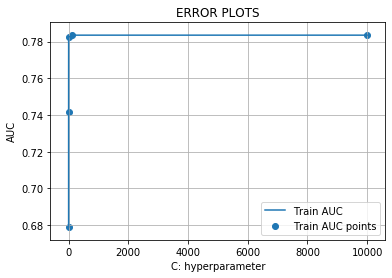

In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

train_auc=[]



C= [10**-4,  10**-2,  10**0,  10**2,  10**4]


for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j , class_weight = 'balanced')
    LR.fit(X_train_1, y_train)

    y_train_pred_1 = batch_predict(LR, X_train_1)   

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    train_auc.append(roc_auc_score(y_train,y_train_pred_1))

plt.plot(C, train_auc, label='Train AUC')

plt.scatter(C, train_auc, label ='Train AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

The graph is not much clear in the given range, hence we will take the log values for x.
Above 100 the AUC value is constant hence the range is not sensible.
We shall choose a sensible range.

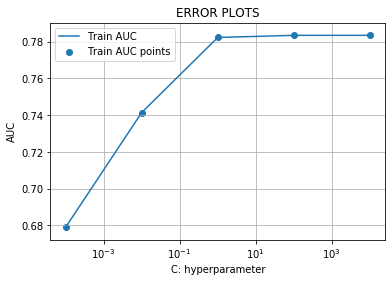

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

train_auc=[]


C= [10**-4,  10**-2,  10**0,  10**2,  10**4]



for j in C:      # since we dont want to overfit or underfit we wont check too less and too high a value
    LR = LogisticRegression(C=j, class_weight='balanced')
    LR.fit(X_train_1, y_train)

    y_train_pred_1 = batch_predict(LR, X_train_1)  

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred_1))
    
plt.plot(C, train_auc, label='Train AUC')

plt.scatter(C, train_auc, label ='Train AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

We are going to choose a value 10^(-2)

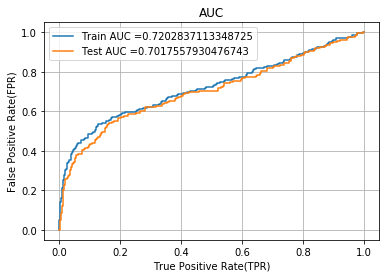

In [69]:
LR= LogisticRegression(C = 0.01)
LR.fit(X_train_1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_1 = batch_predict(LR, X_train_1)
y_test_pred_1 = batch_predict(LR, X_test_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred_1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_1)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion matrix

In [70]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [71]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_1, tr_thresholds, train_fpr, train_fpr)))

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_1, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999993139936244 for threshold 0.131
[[955 954]
 [ 90 234]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24952539918981886 for threshold 0.194
[[796 145]
 [ 76  83]]


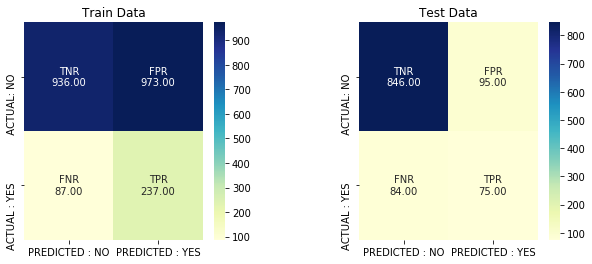

In [72]:
#https://likegeeks.com/seaborn-heatmap-tutorial/
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
data=np.array([[936, 973 ],[ 87 , 237]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax1)
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

data=np.array([[846 , 95 ],[ 84 , 75]] )
text =np.asarray([['TNR', 'FPR'], ['FNR', 'TPR']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
heat_map=sns.heatmap(data,cbar=True,annot=labels,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['  ACTUAL: NO', 'ACTUAL : YES'],fmt='',cmap="YlGnBu",ax=ax2)
ax2.title.set_text('Test Data')
plt.show()

In [76]:
X_train.head(5)

,Account_Length,Vmail_Message,CustServ_Calls,Intl_Plan,Vmail_Plan,Intl_Charge,State,Avg_Night_Calls,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls,Total_Mins,Total_Calls,Total_Charge
275,83,0,3,0,0,2.65,WA,0.816327,0.465221,0.444349,0.510204,575.7,306,62.85
1609,57,0,0,0,0,3.02,VT,0.290820,0.566038,0.477205,0.357143,689.7,291,61.62
1680,107,0,2,0,0,3.43,GA,0.594504,0.498715,0.703167,0.0787402,559.1,334,56.93
2882,178,0,2,1,0,3.08,MI,0.421327,1.07631,0.552408,0.175439,533.9,325,45.24
2497,79,32,2,0,1,1.13,MN,0.824251,1.2253,0.431976,0.952381,398.8,270,32.33


sample = {'Account_Length' : 163,
          'Vmail_Message': 50,
          'Intl_Plan': 1,
          'Vmail_Plan' : 1,
          'Intl_Charge' : 0,
          'State': 'CA',
          'Avg_Night_Calls' : 0.576 ,
          'Avg_Day_Calls' : 0.478 ,
           'Avg_Eve_Calls' : 0.359 ,
          'Avg_Intl_Calls' : 0.973 ,
          'Total_Mins': 900,
          'Total_Calls' : 550,
          'Total_Charge' : 100}

test_sample = np.asarray(sample)
test_sample

list = [ 163, 50, 1, 1,  0, 5.5,  'CA', 0.576 , 0.478 , 0.359 ,0.973 , 900, 550, 100]


columns = ['Account_Length' ,'Vmail_Message', 'CustServ_Calls',
           'Intl_Plan', 'Vmail_Plan' , 'Intl_Charge', 'State', 'Avg_Night_Calls',
           'Avg_Day_Calls', 'Avg_Eve_Calls', 'Avg_Intl_Calls', 
           'Total_Mins','Total_Calls', 'Total_Charge']


sample = pd.DataFrame(list, columns=columns)


#### Modeling and Prediction in short

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = LogisticRegression()

# Fit to the data
clf.fit(X_train_1, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test_1)

y_pred[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Conclusion :- 
    
As we can see in the y_pred array, we can see a lot of zeros which represent that customers will
not churn, ones represent the churners. 
Organization should use these predictions to lure this customers and retain them by offering them 
value. Because from an organizational perspective retention is less expensive than customer 
acquisition.